**Mental Health Diagnosis and Treatment Monitoring**

REDDY SHETTY BHAVANA


In [ ]:
import os

for dirname, _, filenames in os.walk('/kaggle/input'):

    for filename in filenames:

        print(os.path.join(dirname, filename))

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
import plotly.io as pio
from plotly.offline import iplot

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/mental_health_diagnosis_treatment_.csv')
df

,Patient ID,Age,Gender,Diagnosis,Symptom Severity (1-10),Mood Score (1-10),Sleep Quality (1-10),Physical Activity (hrs/week),Medication,Therapy Type,Treatment Start Date,Treatment Duration (weeks),Stress Level (1-10),Outcome,Treatment Progress (1-10),AI-Detected Emotional State,Adherence to Treatment (%)
0,1,43,Female,Major Depressive Disorder,10,5,8,5,Mood Stabilizers,Interpersonal Therapy,2024-01-25,11,9,Deteriorated,7,Anxious,66
1,2,40,Female,Major Depressive Disorder,9,5,4,7,Antipsychotics,Interpersonal Therapy,2024-02-27,11,7,No Change,7,Neutral,78
2,3,55,Female,Major Depressive Disorder,6,3,4,3,SSRIs,Mindfulness-Based Therapy,2024-03-20,14,7,Deteriorated,5,Happy,62
3,4,34,Female,Major Depressive Disorder,6,3,6,5,SSRIs,Mindfulness-Based Therapy,2024-03-29,8,8,Deteriorated,10,Excited,72
4,5,52,Male,Panic Disorder,7,6,6,8,Anxiolytics,Interpersonal Therapy,2024-03-18,12,5,Deteriorated,6,Excited,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,24,Male,Generalized Anxiety,10,4,8,6,Mood Stabilizers,Dialectical Behavioral Therapy,2024-04-09,8,9,Improved,10,Depressed,73
496,497,22,Male,Panic Disorder,5,6,6,7,Benzodiazepines,Mindfulness-Based Therapy,2024-02-05,13,6,Deteriorated,8,Happy,86
497,498,23,Male,Major Depressive Disorder,7,3,4,2,Antidepressants,Cognitive Behavioral Therapy,2024-03-24,10,5,Deteriorated,5,Neutral,87
498,499,48,Male,Bipolar Disorder,9,4,6,9,Antidepressants,Mindfulness-Based Therapy,2024-03-22,10,6,Improved,7,Anxious,73


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Patient ID                    500 non-null    int64 
 1   Age                           500 non-null    int64 
 2   Gender                        500 non-null    object
 3   Diagnosis                     500 non-null    object
 4   Symptom Severity (1-10)       500 non-null    int64 
 5   Mood Score (1-10)             500 non-null    int64 
 6   Sleep Quality (1-10)          500 non-null    int64 
 7   Physical Activity (hrs/week)  500 non-null    int64 
 8   Medication                    500 non-null    object
 9   Therapy Type                  500 non-null    object
 10  Treatment Start Date          500 non-null    object
 11  Treatment Duration (weeks)    500 non-null    int64 
 12  Stress Level (1-10)           500 non-null    int64 
 13  Outcome             

In [ ]:
df_shape=df.shape
df_shape

(500, 17)

In [ ]:
df_columns=df.columns
df_columns

Index(['Patient ID', 'Age', 'Gender', 'Diagnosis', 'Symptom Severity (1-10)',
       'Mood Score (1-10)', 'Sleep Quality (1-10)',
       'Physical Activity (hrs/week)', 'Medication', 'Therapy Type',
       'Treatment Start Date', 'Treatment Duration (weeks)',
       'Stress Level (1-10)', 'Outcome', 'Treatment Progress (1-10)',
       'AI-Detected Emotional State', 'Adherence to Treatment (%)'],
      dtype='object')

In [ ]:
df.describe()

,Patient ID,Age,Symptom Severity (1-10),Mood Score (1-10),Sleep Quality (1-10),Physical Activity (hrs/week),Treatment Duration (weeks),Stress Level (1-10),Treatment Progress (1-10),Adherence to Treatment (%)
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000
mean,250.500000,38.708000,7.478000,5.482000,6.472000,5.216000,12.110000,7.542000,7.436000,75.45400
std,144.481833,12.712433,1.706265,1.707486,1.668167,2.829374,2.440864,1.709409,1.725067,9.08697
min,1.000000,18.000000,5.000000,3.000000,4.000000,1.000000,8.000000,5.000000,5.000000,60.00000
25%,125.750000,28.000000,6.000000,4.000000,5.000000,3.000000,10.000000,6.000000,6.000000,67.00000
50%,250.500000,38.000000,8.000000,5.000000,6.000000,5.000000,12.000000,8.000000,7.000000,76.00000
75%,375.250000,50.000000,9.000000,7.000000,8.000000,8.000000,14.000000,9.000000,9.000000,84.00000
max,500.000000,60.000000,10.000000,8.000000,9.000000,10.000000,16.000000,10.000000,10.000000,90.00000


In [ ]:
df['Age'].value_counts()

,count
Age,
31,19
60,17
50,17
56,16
35,16
19,16
24,15
51,15
40,14


In [ ]:
df['Age'].unique()

array([43, 40, 55, 34, 52, 28, 59, 32, 21, 42, 54, 46, 19, 23, 38, 30, 37,
       41, 50, 53, 60, 56, 58, 44, 47, 39, 27, 45, 33, 31, 48, 26, 18, 29,
       35, 51, 57, 24, 22, 49, 36, 20, 25])

In [ ]:
df['Treatment Start Date'].value_counts()

,count
Treatment Start Date,
2024-03-25,13
2024-01-16,13
2024-03-23,12
2024-01-24,10
2024-01-26,9
...,...
2024-02-11,2
2024-02-10,2
2024-04-05,1


In [ ]:
df=df.drop(['Treatment Start Date'],axis=1)

In [ ]:
df=df.drop([df.columns[3],df.columns[7],df.columns[6],df.columns[10],df.columns[12]],axis=1)

In [ ]:
df

,Patient ID,Age,Gender,Symptom Severity (1-10),Mood Score (1-10),Medication,Therapy Type,Stress Level (1-10),Treatment Progress (1-10),AI-Detected Emotional State,Adherence to Treatment (%)
0,1,43,Female,10,5,Mood Stabilizers,Interpersonal Therapy,9,7,Anxious,66
1,2,40,Female,9,5,Antipsychotics,Interpersonal Therapy,7,7,Neutral,78
2,3,55,Female,6,3,SSRIs,Mindfulness-Based Therapy,7,5,Happy,62
3,4,34,Female,6,3,SSRIs,Mindfulness-Based Therapy,8,10,Excited,72
4,5,52,Male,7,6,Anxiolytics,Interpersonal Therapy,5,6,Excited,63
...,...,...,...,...,...,...,...,...,...,...,...
495,496,24,Male,10,4,Mood Stabilizers,Dialectical Behavioral Therapy,9,10,Depressed,73
496,497,22,Male,5,6,Benzodiazepines,Mindfulness-Based Therapy,6,8,Happy,86
497,498,23,Male,7,3,Antidepressants,Cognitive Behavioral Therapy,5,5,Neutral,87
498,499,48,Male,9,4,Antidepressants,Mindfulness-Based Therapy,6,7,Anxious,73


In [ ]:
df.head()

,Patient ID,Age,Gender,Symptom Severity (1-10),Mood Score (1-10),Medication,Therapy Type,Stress Level (1-10),Treatment Progress (1-10),AI-Detected Emotional State,Adherence to Treatment (%)
0,1,43,Female,10,5,Mood Stabilizers,Interpersonal Therapy,9,7,Anxious,66
1,2,40,Female,9,5,Antipsychotics,Interpersonal Therapy,7,7,Neutral,78
2,3,55,Female,6,3,SSRIs,Mindfulness-Based Therapy,7,5,Happy,62
3,4,34,Female,6,3,SSRIs,Mindfulness-Based Therapy,8,10,Excited,72
4,5,52,Male,7,6,Anxiolytics,Interpersonal Therapy,5,6,Excited,63


In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px
fig=px.histogram(df,x='Age')
fig.show()

In [ ]:
x=df.drop(['Medication'],axis=1)
y=df['Medication']
print('Shape of x=',x.shape)
print('Shape of y=',y.shape)

Shape of x= (500, 10)
Shape of y= (500,)


In [ ]:
x=df.drop(['Medication'],axis=1)
y=df['Medication']
print(x.head())
print(y.head())

   Patient ID  Age  Gender  Symptom Severity (1-10)  Mood Score (1-10)  \
0           1   43  Female                       10                  5   
1           2   40  Female                        9                  5   
2           3   55  Female                        6                  3   
3           4   34  Female                        6                  3   
4           5   52    Male                        7                  6   

                Therapy Type  Stress Level (1-10)  Treatment Progress (1-10)  \
0      Interpersonal Therapy                    9                          7   
1      Interpersonal Therapy                    7                          7   
2  Mindfulness-Based Therapy                    7                          5   
3  Mindfulness-Based Therapy                    8                         10   
4      Interpersonal Therapy                    5                          6   

  AI-Detected Emotional State  Adherence to Treatment (%)  
0             

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=42)
print(train_x.head(2))

     Patient ID  Age  Gender  Symptom Severity (1-10)  Mood Score (1-10)  \
249         250   32    Male                        8                  5   
433         434   52  Female                        8                  8   

                  Therapy Type  Stress Level (1-10)  \
249  Mindfulness-Based Therapy                    6   
433      Interpersonal Therapy                    7   

     Treatment Progress (1-10) AI-Detected Emotional State  \
249                         10                     Anxious   
433                          5                     Excited   

     Adherence to Treatment (%)  
249                          82  
433                          87  


In [ ]:
print(train_y.head(2))

249    Benzodiazepines
433    Antidepressants
Name: Medication, dtype: object


  LINEAR REGRESSION

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
data = df.copy()
categorical_cols = data.select_dtypes(include=['object']).columns
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)
x = data.drop(['Mood Score (1-10)'], axis=1)
y = data['Mood Score (1-10)']
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=42)
model_lr = LinearRegression()
model_lr.fit(train_x, train_y)

LinearRegression()

In [ ]:
y_pred_lr=model_lr.predict(train_x)
y_pred_test_lr=model_lr.predict(test_x)
train_mse_lr=mean_squared_error(train_y,y_pred_lr)
test_mse_lr=mean_squared_error(test_y,y_pred_test_lr)
train_r2_lr=r2_score(train_y,y_pred_lr)
test_r2_lr=r2_score(test_y,y_pred_test_lr)

In [ ]:
print(train_mse_lr)
print(test_mse_lr)
print(train_r2_lr)
print(test_r2_lr)

2.6686649229250192
3.322577941320772
0.06145286525813487
-0.0692125313984786


logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model_lr  = LogisticRegression()
model_lr.fit(train_x, train_y)
y_pred_train=model_lr.predict(train_x)
y_pred_test=model_lr.predict(test_x)

In [ ]:
print(y_pred_test)

[5 5 4 3 6 5 3 6 6 3 6 3 5 6 8 8 3 6 6 3 3 4 5 5 6 8 4 3 5 5 8 6 4 6 6 8 8
 6 8 6 5 6 8 6 6 8 6 6 3 6 6 6 6 3 5 6 5 6 5 6 3 3 5 5 5 6 3 6 5 3 6 5 6 8
 6 3 8 6 3 8 8 6 5 8 3 6 6 3 4 8 3 5 5 3 5 5 5 6 8 6]


In [ ]:
print (y_pred_train)

[8 5 6 5 3 6 5 5 3 6 6 4 8 6 3 3 5 8 8 6 3 8 6 8 3 8 5 6 6 3 6 6 4 6 6 5 6
 6 6 8 6 6 5 3 5 3 6 6 8 4 6 8 6 6 4 6 6 3 4 6 5 5 5 6 5 3 8 6 3 3 5 6 5 6
 8 3 3 5 8 5 8 5 3 3 4 6 5 6 5 3 3 8 3 5 3 8 6 6 6 8 8 3 6 5 5 6 8 6 3 5 6
 6 3 3 3 3 3 5 8 3 8 8 5 6 6 3 5 5 8 6 6 6 3 6 4 5 5 5 3 6 5 3 8 6 4 8 8 8
 3 6 5 8 3 6 5 8 6 4 6 8 5 6 4 6 6 5 5 6 8 6 6 8 6 5 8 3 3 3 6 6 8 3 8 6 6
 3 3 5 5 8 5 8 7 3 8 6 8 6 8 5 3 5 8 6 3 8 3 6 6 8 6 6 4 3 5 6 3 6 3 5 6 3
 6 3 6 8 6 8 3 5 3 6 6 6 3 5 8 3 6 3 6 8 3 3 3 6 4 8 5 6 5 3 6 3 8 6 8 8 6
 6 8 8 8 6 5 6 3 3 5 5 6 3 5 8 5 6 3 6 6 3 5 5 6 8 3 6 6 6 8 6 5 3 5 6 3 4
 3 8 5 6 5 5 5 5 4 3 8 8 3 5 8 6 6 3 6 5 5 6 3 4 6 8 5 6 7 8 3 6 5 5 3 6 5
 5 5 3 4 3 3 4 6 8 6 8 5 3 6 6 5 3 5 6 3 6 3 6 5 6 4 6 6 6 6 8 3 5 6 3 4 5
 8 3 8 3 3 3 3 8 4 6 6 8 8 5 3 6 5 5 5 5 6 5 6 6 6 6 5 5 3 5]


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score,f1_score

In [ ]:
accuracy_train=accuracy_score(train_y,y_pred_train)
print("Accuracy of the Logistic Regression model on your train",accuracy_train)

Accuracy of the Logistic Regression model on your train 0.255


In [ ]:
accuracy_test=accuracy_score(test_y,y_pred_test)
print("Accuracy of the Logistic Regression model on your test",accuracy_test)

Accuracy of the Logistic Regression model on your test 0.2


In [ ]:
confusion_matrix_train=confusion_matrix(train_y,y_pred_train)
print("Confusion matrix of the Logistic Regression model on your train",confusion_matrix_train)

Confusion matrix of the Logistic Regression model on your train [[22  3 13 17  2  6]
 [14  7 10 18  0 13]
 [13  1 25 23  0  8]
 [ 9  4 12 33  0 17]
 [16  3 12 18  0 12]
 [17  2 15 20  0 15]]


In [ ]:
tx,ty=confusion_matrix(test_y,y_pred_test)
print("Confusion matrix of the Logistic Regression model on your test",tx,ty)

ValueError: too many values to unpack (expected 2)

In [ ]:
confusion_matrix_test = confusion_matrix(test_y, y_pred_test)  # Assign to single variable
print("Confusion matrix of the Logistic Regression model on your test:")
print(confusion_matrix_test)  # Print the entire matrix

Confusion matrix of the Logistic Regression model on your test:
[[5 2 4 9 0 3]
 [4 2 5 3 0 2]
 [3 0 5 9 0 2]
 [0 1 2 5 0 5]
 [4 0 2 6 0 1]
 [4 0 5 4 0 3]]


In [ ]:
Raveled_Confusion_Matrix = [5, 2, 4, 9, 0, 3, 4, 2, 5, 3, 0, 2, 3, 0, 5, 9, 0, 2, 0, 1, 2, 5, 0, 5, 4, 0, 2, 6, 0, 1, 4, 0, 5, 4, 0, 3]

In [ ]:
confusion_matrix(test_y,y_pred_test)
# print("Confusion matrix of the Logistic Regression model on your test",tx,ty)

array([[5, 2, 4, 9, 0, 3],
       [4, 2, 5, 3, 0, 2],
       [3, 0, 5, 9, 0, 2],
       [0, 1, 2, 5, 0, 5],
       [4, 0, 2, 6, 0, 1],
       [4, 0, 5, 4, 0, 3]])

In [ ]:
from sklearn.metrics import confusion_matrix

# Assuming you have test_y and y_pred_test defined
cm = confusion_matrix(test_y, y_pred_test)  # Call the function to get the matrix

# Accessing the element at row 0, column 1
element_0_1 = cm[0, 1]  # Use cm instead of confusion_matrix
print(element_0_1)

# Accessing the entire first row
first_row = cm[0]      # Use cm instead of confusion_matrix
print(first_row)

2
[5 2 4 9 0 3]


decision tree


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
dt=DecisionTreeClassifier(criterion='entropy')
dt.fit(train_x,train_y)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
dt=DecisionTreeClassifier(criterion='entropy')
dt.fit(train_x,train_y)
y_pred_train=dt.predict(train_x)
y_pred_test=dt.predict(test_x)

In [ ]:
accuracy_train=accuracy_score(train_y,y_pred_train)
print("Accuracy of the Decision Tree model on your train",accuracy_train)

Accuracy of the Decision Tree model on your train 1.0


In [ ]:
accuracy_test=accuracy_score(test_y,y_pred_test)
print("Accuracy of the Decision Tree model on your test",accuracy_test)

Accuracy of the Decision Tree model on your test 0.17


k-Neighboursclassifer (knn)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model_knn=KNeighborsClassifier(n_neighbors=5)
model_knn.fit(train_x,train_y)
y_pred_train_knn=model_knn.predict(train_x)
y_pred_test_knn=model_knn.predict(test_x)
print(y_pred_test_knn)
print(y_pred_train_knn)

[7 4 7 3 8 4 4 6 4 3 7 6 4 7 6 4 4 6 3 3 3 4 7 5 6 4 5 5 7 7 3 7 8 4 6 7 3
 3 3 3 3 7 4 4 5 6 6 6 4 6 4 7 3 3 7 6 3 6 6 3 8 3 3 4 3 6 7 8 8 4 3 8 3 6
 6 4 5 4 3 4 3 8 4 3 3 7 7 7 4 6 6 4 4 3 3 5 3 3 8 3]
[7 8 4 6 3 6 3 5 7 4 3 5 5 4 4 5 7 4 6 6 3 7 3 3 3 8 7 7 4 7 5 8 4 4 5 5 7
 6 8 6 3 3 3 8 7 8 6 5 6 4 3 4 5 8 4 8 3 3 3 6 3 8 5 6 8 5 4 3 8 4 6 6 8 6
 7 3 3 8 4 4 6 6 3 3 3 6 5 6 3 3 8 8 3 4 4 3 3 8 3 4 4 8 5 6 6 7 5 8 4 5 8
 3 8 5 6 3 4 4 5 6 3 6 6 3 5 7 6 3 5 4 4 8 3 6 3 5 7 5 3 6 6 8 5 3 6 3 6 6
 8 6 4 3 8 6 3 7 5 3 3 3 3 4 3 5 8 8 5 8 4 6 4 6 8 4 6 7 6 3 7 3 4 5 7 6 4
 3 4 7 8 4 5 5 3 3 7 8 3 3 3 5 4 4 4 3 3 6 6 6 8 4 7 6 3 3 3 4 7 4 7 3 6 7
 5 4 3 4 8 4 8 6 3 5 8 5 3 5 4 3 5 8 5 4 5 6 5 8 3 5 6 7 4 5 6 6 8 7 3 8 5
 6 8 3 3 4 6 6 6 3 6 8 6 4 6 4 3 3 3 3 6 6 3 5 7 6 4 4 3 4 5 8 3 4 3 5 5 5
 3 3 4 7 5 4 3 7 3 8 5 5 3 3 3 8 3 3 3 4 5 8 6 6 3 8 4 8 4 6 3 5 6 8 4 8 5
 4 6 7 8 6 4 4 7 3 6 3 3 8 3 3 4 3 6 3 3 6 3 6 3 8 5 8 6 4 5 5 6 5 5 4 3 8
 3 5 7 4 4 5 5 8 4 3 4 8 5 7 6 8 4 7 3 4 3 3 7

In [ ]:
accuracy_test_knn=accuracy_score(test_y,y_pred_test_knn)
print("Accuracy of the KNN model on your test",accuracy_test_knn)
# Specify the 'average' parameter to handle multiclass classification
precision_score_knn=precision_score(test_y,y_pred_test_knn, average='weighted') # or 'micro', 'macro'
print("Precision of the KNN model on your test",precision_score_knn)
recall_score_knn=recall_score(test_y,y_pred_test_knn, average='weighted') # or 'micro', 'macro'
print("Recall of the KNN model on your test",recall_score_knn)
f1_score_knn=f1_score(test_y,y_pred_test_knn, average='weighted') # or 'micro', 'macro'
print("F1 score of the KNN model on your test",f1_score_knn)
accuracy_train_knn=accuracy_score(train_y,y_pred_train_knn)
print("Accuracy of the KNN model on your train",accuracy_train_knn)

Accuracy of the KNN model on your test 0.23
Precision of the KNN model on your test 0.19946662085623854
Recall of the KNN model on your test 0.23
F1 score of the KNN model on your test 0.20540920681098654
Accuracy of the KNN model on your train 0.39


k-means clustering

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
k=3
kmeans=KMeans(n_clusters=k,random_state=42)
kmeans.fit(train_x)
column_for_clustering=['Age','Stress Level (1-10)']
df_for_clustering=df[column_for_clustering]
kmeans.fit(df_for_clustering) # Changed model_kmeans to kmeans
cluster_labels=kmeans.predict(df_for_clustering) # Changed model_kmeans to kmeans
df['cluster_labels']=cluster_labels

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(train_x)

# Print the available columns to verify the correct name
print(df.columns)

# Assuming 'Stress Level (1-10)' or similar is the actual column:
column_for_clustering = ['Age', 'Stress Level (1-10)']  # Replace with the correct column name
df_for_clustering = df[column_for_clustering]

# Now you can proceed with fitting the model:
# model_kmeans.fit(df_for_clustering)
# ...

Index(['Patient ID', 'Age', 'Gender', 'Symptom Severity (1-10)',
       'Mood Score (1-10)', 'Medication', 'Therapy Type',
       'Stress Level (1-10)', 'Treatment Progress (1-10)',
       'AI-Detected Emotional State', 'Adherence to Treatment (%)',
       'cluster_labels'],
      dtype='object')


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming 'age' is the correct column name in your DataFrame
column_for_clustering = ['Age','Stress Level (1-10)']
df_for_clustering = df[column_for_clustering]

# Initialize the KMeans model here
model_kmeans = KMeans(n_clusters=3, random_state=42)

# Now you can fit the model
model_kmeans.fit(df_for_clustering)

# Get cluster labels and centers
cluster_labels = model_kmeans.labels_
cluster_centers = model_kmeans.cluster_centers_

# Assign cluster labels to the DataFrame
df['cluster_labels'] = cluster_labels

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [ ]:
# Assuming 'age' is the correct column name in your DataFrame
column_for_clustering = ['Age','Stress Level (1-10)']
df_for_clustering = df[column_for_clustering]


In [ ]:
# Initialize the KMeans model here
model_kmeans = KMeans(n_clusters=3, random_state=42)
# Now you can fit the model
model_kmeans.fit(df_for_clustering)
# Get cluster labels and centers
cluster_labels = model_kmeans.labels_
cluster_centers = model_kmeans.cluster_centers_
# Assign cluster labels to the DataFrame
df['cluster_labels'] = cluster_labels

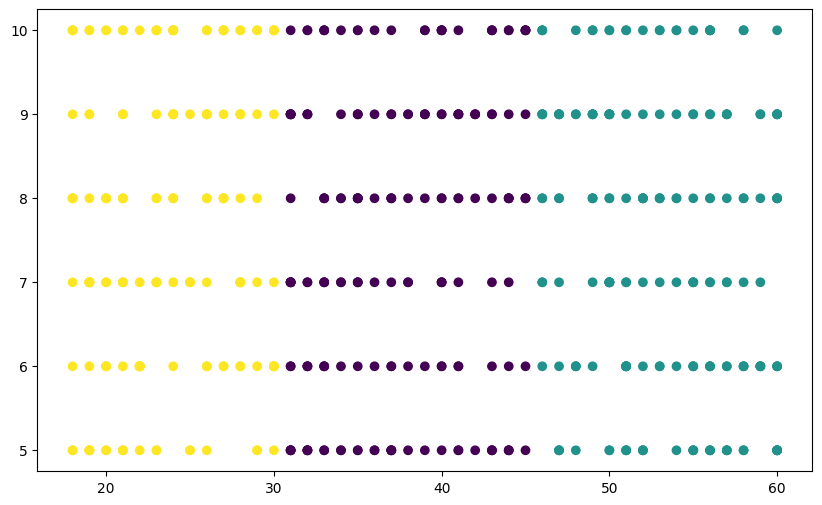

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Stress Level (1-10)'], c=df['cluster_labels'], cmap='viridis')


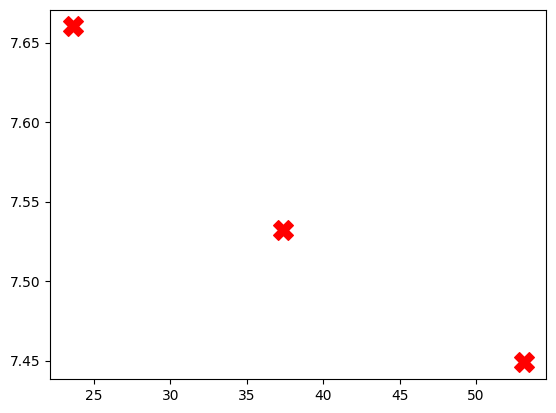

In [ ]:
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='X', s=200, label='Cluster Centers')


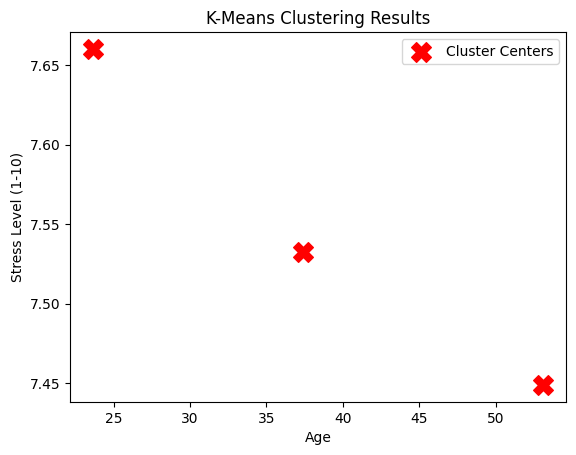

In [ ]:
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.xlabel('Age')
plt.ylabel('Stress Level (1-10)')
plt.title('K-Means Clustering Results')
plt.legend()
plt.show()

K-MEANS WITH PERFORMANCE METRICS


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
# Import the missing metrics from sklearn.metrics.cluster
from sklearn.metrics.cluster import homogeneity_score, completeness_score, v_measure_score
import matplotlib.pyplot as plt
k=2
model_kmeans=KMeans(n_clusters=k,random_state=42)
model_kmeans.fit(x)

KMeans(n_clusters=2, random_state=42)

In [ ]:
cluster_labels=model_kmeans.labels_
cluster_centers=model_kmeans.cluster_centers_

In [ ]:
inertia=model_kmeans.inertia_
print("Inertia:",inertia)

Inertia: 2731341.7919999994


In [ ]:
silhoutte=silhouette_score(x,cluster_labels)
print("Silhouette score:",silhoutte)

Silhouette score: 0.606993419557012


In [ ]:
davies_bouldin_score=davies_bouldin_score(x,cluster_labels)
print("Davies-Bouldin score:",davies_bouldin_score)

Davies-Bouldin score: 0.5251450933185664


In [ ]:
calinski_harabasz_score=calinski_harabasz_score(x,cluster_labels)
print("Calinski-Harabasz score:",calinski_harabasz_score)

Calinski-Harabasz score: 1424.4591034764205


In [ ]:
homogeneity_score=homogeneity_score(cluster_labels,y)
print("Homogeneity score:",homogeneity_score)

Homogeneity score: 0.015220082951500838


In [ ]:
v_measure_score=v_measure_score(cluster_labels,y)
print("V-measure score:",v_measure_score)

V-measure score: 0.008498547804926659


homogeneity: 0.015220082951500838
completeness: <function completeness_score at 0x7de52cb8a950>
v_measure: 0.008498547804926659


<Figure size 800x600 with 0 Axes>

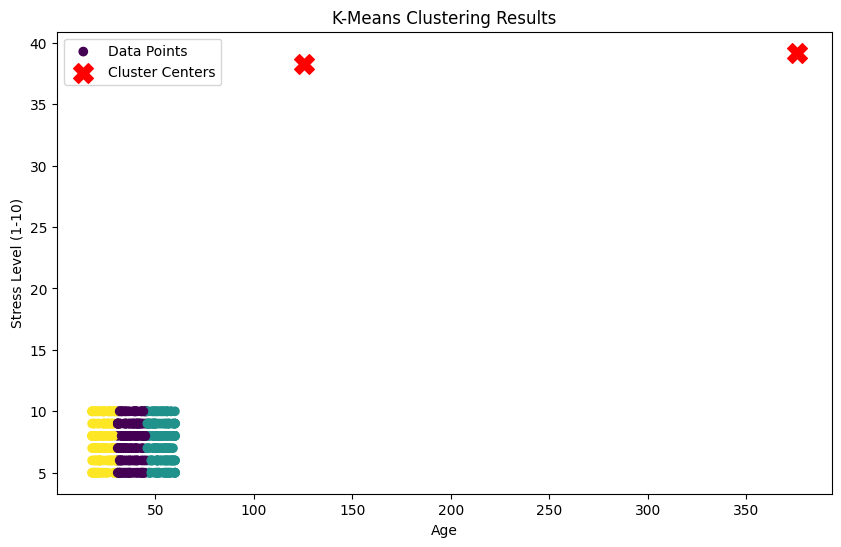

In [ ]:
print("homogeneity:",homogeneity_score)
print("completeness:",completeness_score)
print("v_measure:",v_measure_score)

# Create a figure and axes with the desired size
plt.figure(figsize=(8,6))  # Changed from plt.fig to plt.figure

colors=['red','blue']
lw=2

plt.figure(figsize=(10, 6))
# Add labels to the scatter plots for the legend to work
plt.scatter(df['Age'],df['Stress Level (1-10)'],c=df['cluster_labels'],cmap='viridis', label='Data Points')
plt.scatter(cluster_centers[:,0],cluster_centers[:,1],c='red',marker='X',s=200, label='Cluster Centers')

plt.xlabel('Age')
plt.ylabel('Stress Level (1-10)')
plt.title('K-Means Clustering Results')

# Now the legend will have something to display
plt.legend()
plt.show()

LINEAR DISCRIMINANT ANALYSIS


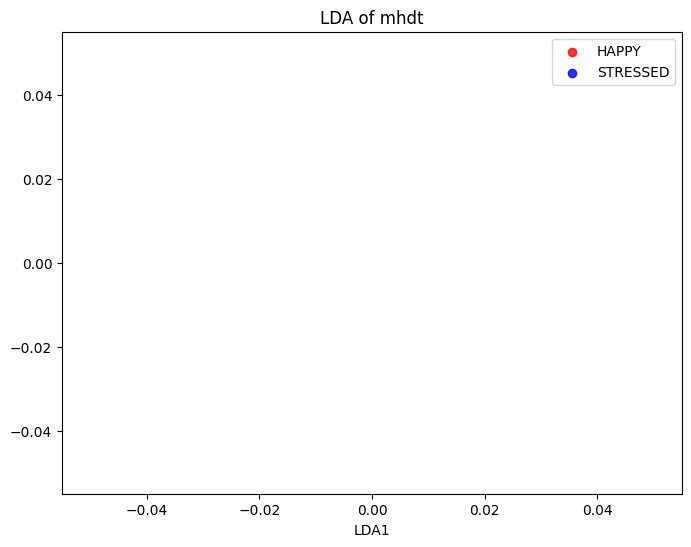

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt
import numpy as np
lda=LDA(n_components=2)
x_lda=lda.fit_transform(x,y)
plt.figure(figsize=(8,6))
colors=['red','blue']
lw=2
for color,i,target_name in zip(colors,[0,1],['HAPPY','STRESSED']):
    plt.scatter(x_lda[y==i,0],x_lda[y==i,1],alpha=.8,c=color,label=target_name)
    plt.legend(loc='best',shadow=False,scatterpoints=1)
    plt.title('LDA of mhdt')
    plt.xlabel('LDA1')
plt.show()